# **Semestrálny projekt – Jednotné programovacie družstvo**

## Úvodné importy a definície

In [ ]:
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas

Ako úložisko využitých datasetov sme sa rozhodli využiť Google Drive. Pri načítaní dát z Disku však dochádza k častému problému, keď link na zdieľanie súboru nie je správne načítaný použitím metódy ```pandas.read_csv()```. Z tohto dôvodu bola zadefinovaná metóda na úpravu problematického linku tak, aby použitie metódy ```pandas.read_csv()``` bolo bezproblémové.





In [ ]:
! mkdir img

mkdir: cannot create directory ‘img’: File exists


In [ ]:
def download_link(url):
  '''Metóda na úpravu share linku z Google Drive'''
  return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

Funkcia na rýchle vykresľovanie grafov s okresmi Slovenska, takéto grafy vykresľujeme často.

In [ ]:
# podklady na vizualizáciu máp podľa okresov Slovenska
url = "https://bbrejova.github.io/viz/data/districts.json"
districts_bounds = geopandas.read_file(url)

def map_plot(data: pd.Series, title: str=None, log: bool=False, **kwargs):
  """
  Funkcia `map_plot` - vykreslí mapu Slovenska podľa okresov.
  `data: pd.Series` - aké čísla sa majú do mapy zobraziť
  `title: str=None` - názov grafu
  `log: bool=False` - či sa majú dáta v Series data zlogaritmovať pred vykreslením
  `kwargs` - ostatné parametre, ktoré sa pošlú do plotovacej funkcie, predvolene
             to sú: cmap="Blues", figsize=(11,5), edgecolor="black"
  """
  districts_table = districts_bounds.copy() # type: geopandas.GeoDataFrame
  districts_table.set_index("IDN3")
  districts_table["new"] = np.log(data).to_list() if log else data.to_list() # creating new column
  # update arguments of plot method from kwargs
  kwargs = {"cmap": 'Blues', "figsize": (11,5), "edgecolor": "black"} | kwargs
  districts_table.plot(column="new", **kwargs)
  plt.axis("off") # unimportant axes
  if plt.title is not None:
    plt.title(title)

## Základné informácie

Ako prvé sú ustanovené základné atribúty štatistického súboru. V prvom rade uvádzame štruktúru obyvateľstva Slovenskej republiky z hľadiska pohlaví a následne aj veku. Definujme aj vekové rozmedzia socioekonomických skupín, ktoré sú v reporte využívané:

*   **Predproduktívni** – vek 0-14 rokov
*   **Produktívni** – vek 15-64 rokov
*   **Postproduktívni** – vek 65+ rokov



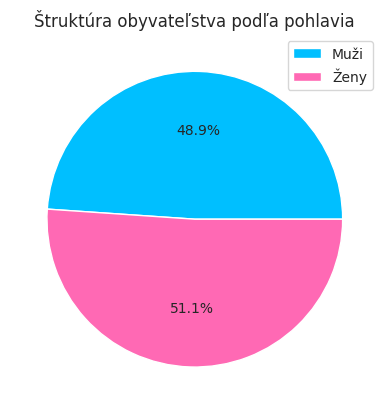

<Figure size 2500x1000 with 0 Axes>

In [ ]:
# Štruktúra obyvateľstva podľa veku a pohlavia
sns.set_style("whitegrid")
fig, axes = plt.subplots()

plt.figure(figsize=(25, 10))

axes.pie([2665376, 2783894], autopct='%1.1f%%', colors=["deepskyblue","hotpink"])
axes.set_title("Štruktúra obyvateľstva podľa pohlavia")
axes.legend(["Muži", "Ženy"])

'''
axes[1].set_visible(False)

axes[2].pie([867410, 3652679, 929181],
            startangle=270, autopct='%1.1f%%', radius=2)
axes[2].set_title("Štruktúra obyvateľstva podľa veku", pad=60)
axes[2].legend(["Predproduktívni", "Produktívni", "Postproduktívni"])
'''
fig.savefig('img/obr01.pdf')
plt.show()
pass

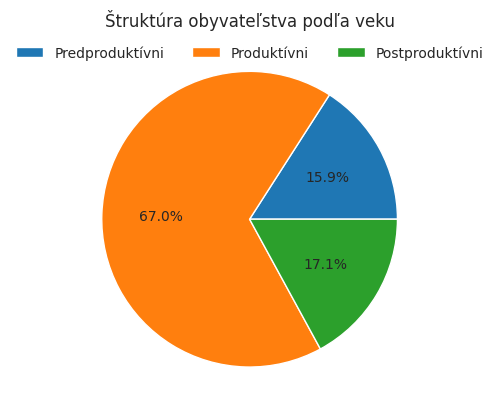

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots()

#plt.figure(figsize=(25, 20))

axes.pie([867410, 3652679, 929181], autopct='%1.1f%%')
axes.set_title("Štruktúra obyvateľstva podľa veku")
axes.legend(["Predproduktívni", "Produktívni", "Postproduktívni"], loc='center',frameon=False,bbox_to_anchor=(.5, 0.95),ncol=3)
fig.savefig('img/obr02.pdf')
plt.show()
pass

I napriek tomu, že vo vizualizácii vyššie uvádzame aj vekovú skupinu do 15 rokov, v ďalších analýzach vzdelanosti nebude táto skupina braná do úvahy, nakoľko jej kontribúcia k absolútnej početnosti vysokoškolsky vzdelanej, resp. populácie s najvyšším maturitným vzdelaním, je nulová.

Za pomoci datasetu, ktoré je voľne dostupný ako výstup Sčítania obyvateľov, domov a bytov 2021, dokážeme vizualizovať aj rozloženie obyvateľstva medzi jednotlivými samosprávnymi krajmi SR.

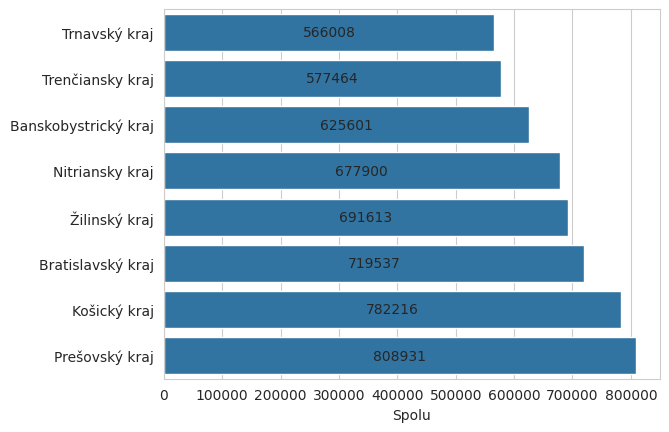

In [ ]:
# Štruktúra obyvateľstva podľa jednotlivých samosprávnych krajov SR
data = pd.read_csv(download_link("https://drive.google.com/file/d/1WefJGmasFT3syFEhwgQJ-M0p4OGnALfJ/view?usp=sharing"))
data = data.sort_values("Spolu")
plot = sns.barplot(data=data, x="Spolu", y="Územná jednotka")
plot.set_ylabel(None)
plot = plot.bar_label(plot.containers[0], label_type="center")
plt.show()

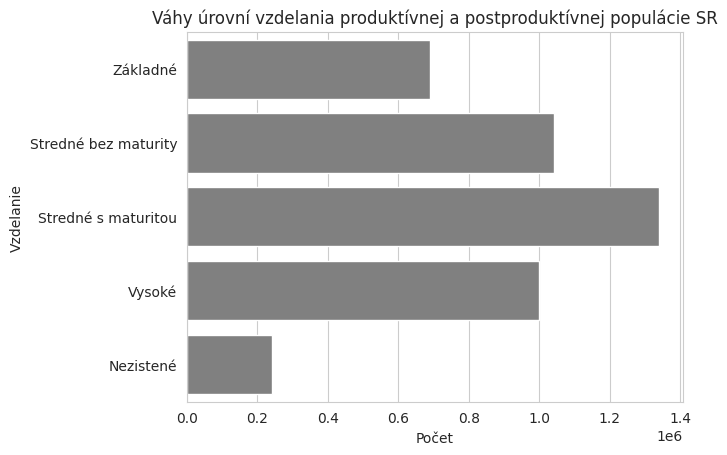

In [ ]:
vzdelanie_okresy_pohlavie=pd.read_csv(download_link("https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing"), sep=";")
dospeli=vzdelanie_okresy_pohlavie[vzdelanie_okresy_pohlavie['Ekonomické vekové skupiny'].str.contains("pred")==False]
maturita_only=dospeli[dospeli['Vzdelanie'].str.contains("s maturitou")]
zs_only=dospeli[dospeli["Vzdelanie"].str.contains("základné")]
stredne_bez_maturity=dospeli[dospeli['Vzdelanie'].str.contains("stredné odborné")]
vysokoskolske=dospeli[dospeli["Vzdelanie"].str.contains("vysoko")]
ine=dospeli[dospeli["Vzdelanie"].str.contains("vyššie|vysoko|s maturitou|základné|stredné odborné")==False]
najvyssie_ukoncene_skupiny=["Základné", "Stredné bez maturity", "Stredné s maturitou", "Vysoké","Nezistené"]
najvyssie_ukoncene_pocet=[sum(zs_only["abs."]),sum(stredne_bez_maturity["abs."]),sum(maturita_only["abs."]),sum(vysokoskolske["abs."]),sum(ine["abs."])]
najvyssie_ukoncene_df=pd.DataFrame({"Vzdelanie":najvyssie_ukoncene_skupiny,"Počet":najvyssie_ukoncene_pocet})
#display(vzdelanie_okresy_pohlavie)
plot2 = sns.barplot(x="Počet", y="Vzdelanie", data=najvyssie_ukoncene_df,color="gray").set_title("Váhy úrovní vzdelania produktívnej a postproduktívnej populácie SR")
plt.show()
# Label k barplotu

Z vizualizácie je evidentné, že v populácii SR nad 15 rokov majú najväčšiu váhu tí so stredoškolským vzdelaním s maturitnou skúšku *(približne 1.3 milióna)*. Necelý milión zas populácia s ukončeným aspoň prvým stupňom vysokej školy, v tesnom závese populácie stredoškolskom bez maturity. Približne necelých 700-tisíc obyvateľov SR má najvyššie základné vzdelanie. Približne 230-tisíc obyvateľov pri evidencii sčítania neuviedlo svoje najvyššie ukončené vzdelanie, resp. bližšie ho nešpecifikovalo.

### Najvyššie dosiahnuté vzdelanie podľa pohlavia

In [ ]:
vzdelanie_vek = pd.read_csv(download_link("https://drive.google.com/file/d/1nLGWtVLPVi53oi_C0sbBWUWE8M3vcjCF/view?usp=sharing"), sep=";")
vzdelanie_vek['Vek'].replace({'90 a viac rokov': '90+'}, inplace=True) # for truer plot
neziaci = vzdelanie_vek[vzdelanie_vek['Súčasná ekonomická aktivita'].str.contains("dieťa|študent|žiak|nezistené") == False].query('Vek >= "18"')
zakladne = neziaci.query('Vzdelanie.str.contains("základné")')
stredne = neziaci.query('Vzdelanie.str.contains("stredné|vyššie")')
vysoke = neziaci.query('Vzdelanie.str.contains("vysokoškolské")')
bez = neziaci.query('Vzdelanie.str.contains("bez školského vzdelania")')

pohlavie_zakladne = zakladne.groupby('Pohlavie')['abs.'].sum()
pohlavie_stredne = stredne.groupby('Pohlavie')['abs.'].sum()
pohlavie_vysoke = vysoke.groupby('Pohlavie')['abs.'].sum()
pohlavie_bez = bez.groupby('Pohlavie')['abs.'].sum()

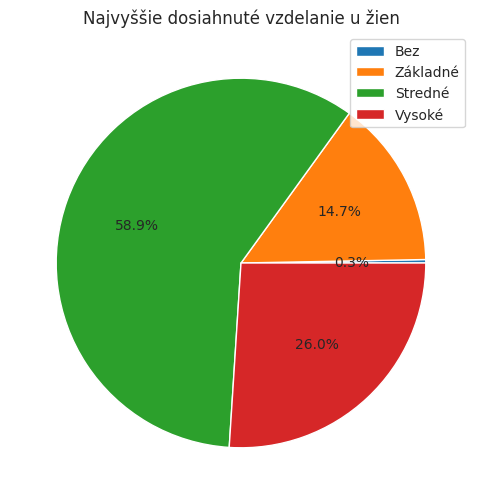

In [ ]:
plt.figure(figsize=(6,6))
plt.pie([pohlavie_bez['žena'], pohlavie_zakladne['žena'], pohlavie_stredne['žena'], pohlavie_vysoke['žena']], autopct='%1.1f%%')
plt.legend(['Bez', 'Základné', 'Stredné', 'Vysoké'])
plt.title(label="Najvyššie dosiahnuté vzdelanie u žien")
plt.savefig('img/obr06.pdf')
plt.show()

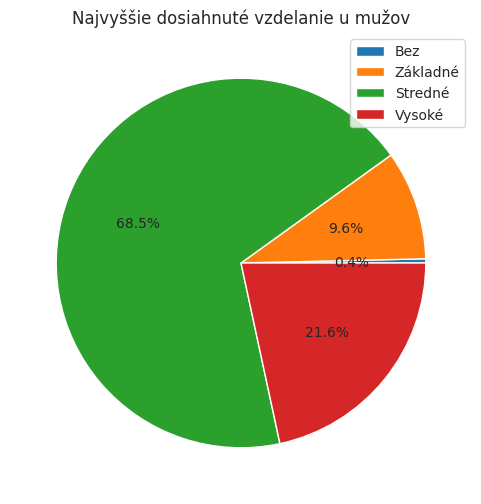

In [ ]:
plt.figure(figsize=(6,6))
plt.pie([pohlavie_bez['muž'], pohlavie_zakladne['muž'], pohlavie_stredne['muž'], pohlavie_vysoke['muž']], autopct='%1.1f%%')
plt.legend(['Bez', 'Základné', 'Stredné', 'Vysoké'])
plt.title(label="Najvyššie dosiahnuté vzdelanie u mužov")
plt.savefig('img/obr07.pdf')
plt.show()

## Vidiek vs mesto
Na území Slovenskej republiky sa nachádza 2927 obcí, z toho 141 má štatút mesta. Dôležitým ukazovateľom miery vzdelania je prípadný rozdiel medzi mierou vzdelania obyvateľstva vidieka a miest.

In [ ]:
## ZOZNAM SLOVENSKÝCH MIEST PODĽA WIKI
table = pd.read_html('https://sk.wikipedia.org/wiki/Zoznam_miest_na_Slovensku')[0]
mesta = table.iloc[:,2]
mesta = list(mesta)

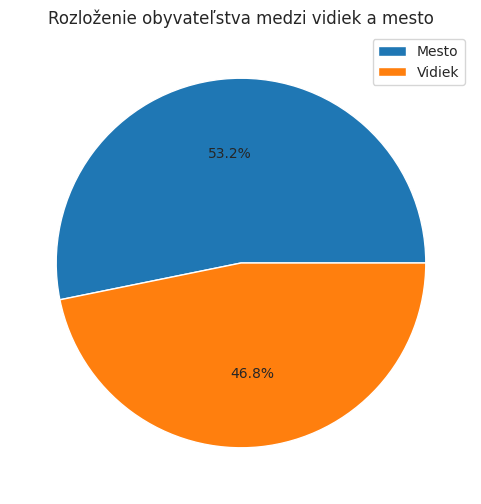

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie([2898474, 2550796], autopct='%1.1f%%')
#plt.pie([2898474, 2550796], labels=["Mesto", "Vidiek"], autopct='%1.1f%%')
plt.title("Rozloženie obyvateľstva medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr05.pdf')
plt.show()


Z dát je jasné, že v miernej väčšine je obyvateľstvo v mestách, ktoré predstavuje 53.2% a zvyšných 46.8% predstavuje obyvateľstvo na vidieku.

## Nezamestnanosť

Zistíme percentuálny podiel nezamestnaných celkovo na Slovensku a aj v jednotlivých okresoch a vykreslíme na porovnanie s inými mapkami (najmä podiel vysokoškolsky vzdelaného obyvateľstva a obyvateľstva s maturitným vzdelaním)

In [ ]:
# základné údaje o populácii v jednotlivých okresoch Slovenska
okresy_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1JCD86DVe-IYimbNe44tlMzOBnkrQ7cWa/view?usp=sharing"))

# veľká tabuľka s dimenziami: pohlavie, vek (1 ročné skupiny), vzdelanie,
# súčasná ekonomická aktivita
vek_ekon_okresy = pd.read_csv(download_link("https://drive.google.com/file/d/1Ul4DOa69jUFFDbV8wneLZdm1d8beaDSM/view?usp=sharing"), sep=';')

# úprava stĺpca s vekom potrebná pre ďalšie analýzy
vek_ekon_okresy['Vek'] = vek_ekon_okresy['Vek'].apply(lambda vek: int(vek.split()[0]))
nepredproduktivni_vek_ekon = vek_ekon_okresy.query("Vek > 14")

In [ ]:
nezamestnani = vek_ekon_okresy.query("`Súčasná ekonomická aktivita`=='nezamestnaný'")
nezamestnani = nezamestnani.set_index(["Názov okresu", "Pohlavie"])
pocty = nezamestnani.groupby("Názov okresu")["abs."].sum()
percenta_nezamestnani = okresy_populacie.set_index("Územná jednotka").sort_values(by="Územná jednotka")["Spolu"]
percenta_nezamestnani = round(100*pocty/percenta_nezamestnani, 3)

# súhrnná štatistika počtu nezamestnaných
vsetci = vek_ekon_okresy['abs.'].sum()
nepredproduktivni = nepredproduktivni_vek_ekon['abs.'].sum()
display(Markdown(
    "Nezamestnaných je {} obyvateľov, čo tvorí {} % populácie, alebo {} %, ak vynecháme predproduktívnu populáciu."
                 .format(nezamestnani['abs.'].sum(),
                         round(100*nezamestnani['abs.'].sum()/vsetci, 3),
                         round(100*nezamestnani['abs.'].sum()/nepredproduktivni, 3))
))

Nezamestnaných je 230392 obyvateľov, čo tvorí 4.228 % populácie, alebo 5.028 %, ak vynecháme predproduktívnu populáciu.

In [ ]:
display(Markdown("**Okresy s najnižšou nezamestnanosťou (%)**"))
display(percenta_nezamestnani.sort_values().head())
display(Markdown("**Okresy s najvyššou nezamestnanosťou (%)**"))
display(percenta_nezamestnani.sort_values(ascending=False).head(15))
# vypísané okresy sa môžu použiť v reporte

**Okresy s najnižšou nezamestnanosťou (%)**

Názov okresu
Okres Bratislava I      1.895
Okres Hlohovec          2.254
Okres Trenčín           2.284
Okres Nitra             2.330
Okres Bratislava III    2.363
dtype: float64

**Okresy s najvyššou nezamestnanosťou (%)**

Názov okresu
Okres Rimavská Sobota      10.489
Okres Revúca               10.484
Okres Rožňava               8.953
Okres Kežmarok              8.786
Okres Vranov nad Topľou     8.273
Okres Medzilaborce          8.177
Okres Poltár                8.069
Okres Sobrance              8.053
Okres Svidník               8.032
Okres Trebišov              7.710
Okres Stropkov              7.647
Okres Sabinov               7.506
Okres Bardejov              7.332
Okres Michalovce            6.770
Okres Lučenec               6.712
dtype: float64

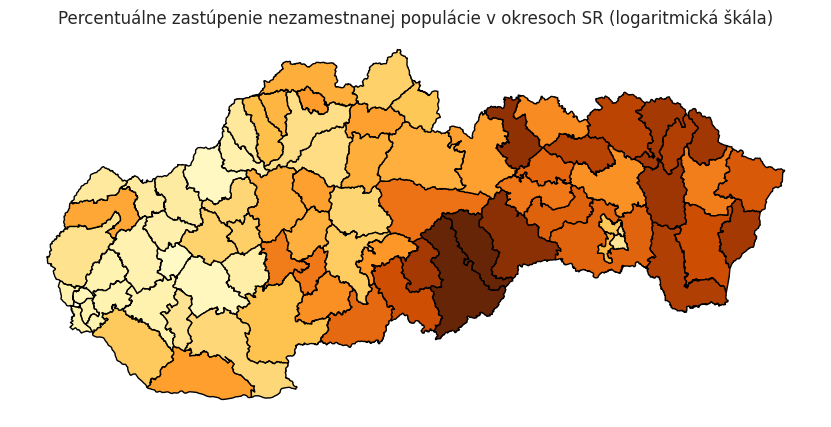

In [ ]:
title = "Percentuálne zastúpenie nezamestnanej populácie v okresoch SR (logaritmická škála)"
map_plot(percenta_nezamestnani, title=title, log=True, legend=False, cmap='YlOrBr')
plt.savefig('img/obr08.pdf')
plt.show()
pass

V mape je evidentný markantný rozdiel medzi regiónmi západného a východného, resp. časti stredného Slovenska. Okresy najmä Gemeru (okresy Poltár, Rimavská Sobota a Revúca) alebo okres Kežmarok trpia vysokou mierou nezamestnanosti. Komparatívne je vyššia úroveň nezamestnanosti v regiónoch východnejších ako západnejších.

V demografických pozorovaniach sa ustálil pojem tzv. **hladovej doliny** pre vyčlenené územia s mierou nezamestnanosti nad 20%. Dôvodov, prečo došlo k takému nárastu miery nezamestnanosti je mnoho, pri týchto regiónoch môžeme brať do úvahy napríklad odchody veľkých, najmä priemyselných, zamestnávateľov z okresu, ktorí to možno pôsobili donedávna alebo nedostatočný prístup obyvateľstva k vzdelaniu, ktoré by potenciálni zamestnávatelia požadovali – s tým možno hypotetizovať aj o neatraktivite regiónu pre vstup veľkých zamestnávateľov.

### Súvislosť so vzdelaním

V nasledujúcej časti preskúmame, či a ako súvisí nezamestnanosť s najvyšším dosiahnutým vzdelaním.

In [ ]:
nezam_tab = pd.DataFrame()
nezam_tab['vsetci'] = nepredproduktivni_vek_ekon.groupby("Vzdelanie")['abs.'].sum()
nezamestnani_vek_ekon = nepredproduktivni_vek_ekon.query("`Súčasná ekonomická aktivita`=='nezamestnaný'")
nezam_tab['nezamestnani'] = nezamestnani_vek_ekon.groupby("Vzdelanie")['abs.'].sum()
nezam_tab['percenta'] = nezam_tab['nezamestnani'] / nezam_tab['vsetci']
nezam_tab['percenta'] = nezam_tab['percenta'].apply(lambda x: 100 * round(x, 5))
nezam_tab.sort_values(by='percenta', inplace=True, ascending=False)
display(nezam_tab)

,vsetci,nezamestnani,percenta
Vzdelanie,,,
vyššie odborné vzdelanie (bližšie neuvedené),43,41,95.349
základné vzdelanie (bližšie neuvedené),7951,4867,61.212
stredné odborné (učňovské) vzdelanie bez maturity (bližšie neuvedené),6809,3894,57.189
bez školského vzdelania – osoby vo veku 15 rokov a viac,13930,1450,10.409
základné vzdelanie - 1. stupeň základnej školy,107009,11017,10.295
základné vzdelanie - 2. stupeň základnej školy,574608,43228,7.523
"stredné odborné (učňovské) vzdelanie bez maturity a bez výučného listu (zaškolenie, zaučenie)",89879,6288,6.996
stredné odborné (učňovské) vzdelanie bez maturity s výučným listom,834806,47497,5.690
stredné odborné (učňovské) vzdelanie bez maturity s vysvedčením o záverečnej skúške,112002,6178,5.516


Vidíme, že stĺpce so vzdelaním "nezistené" a "(bližšie neuvedené)" sú jednoznační outlieri, prípadne dokonca štatistické chyby, majú aj oveľa menšie absolútne počty, preto sa môžu v grafe vynechať (v texte reportu sa môžu spomenúť a vysvetliť situácia).

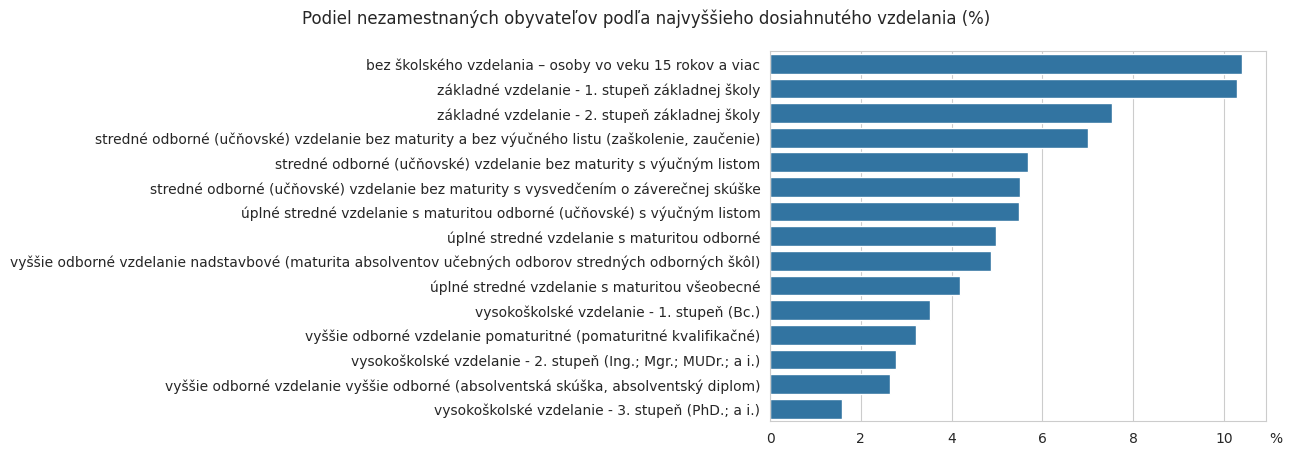

In [ ]:
nezam_plottab = nezam_tab.query('(index.str.contains("bližšie")) == False ' +
                                '& index != "nezistené" & index != "dôverné"')
ax = sns.barplot(data=nezam_plottab['percenta'], x=None,
                   y=None, orient='h')
ax.set_xlabel(None)
ax.set_ylabel(None)
title = "Podiel nezamestnaných obyvateľov podľa najvyššieho dosiahnutého vzdelania (%)"
ax.set_title(title, x=-0.25, pad=20)
ax.text(11, 15.35, "%")
plt.savefig('img/obr09.pdf')
plt.show()
pass

Z tohto grafu možno vyvodiť, že skupiny obyvateľov s vyšším vzdelaním majú menší percentuálny podiel nezamestnaných, než obyvatelia s nižším vzdelaním alebo úplne bez vzdelania. Poradie v tabuľke podielov nezamestnaných celkom presne korešponduje s dĺžkou potrebného štúdia, prípadne jeho náročnosťou. Neprekvapí fakt, že jasne najvyšší podiel nezamestnanosti majú skupiny obyvateľov bez školského vzdelania a s absolvovaným 1. stupňom ZŠ a najnižší podiel nezamestnaných je medzi obyvateľmi s vedeckou kvalifikáciou (s titulmi PhD., CSc., doc., prof., ...)

Za povšimnutie stojí lepšia zamestnanosť absolventov *vyššieho pomaturitného odborného vzdelania* než absolventov *bakalárskeho štúdia* a aj lepšia zamestnanosť absolventov *pomaturitného štúdia s absolutóriom (absolventská skúška, absolventský diplom)* než absolventov *druhého stupňa vysokoškolského štúdia*.

### Vtip do prezentácie?

Treba si občas aj trochu zasrandovať... 😃
* Isto hej - Jakub
*  Velice súhlasím – Marek






In [ ]:
# ak padajú ďalšie framy na chybe že nie je latex, tak treba spustiť tento kód (stačí raz za session)
# ! sudo apt-get update
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
# ! wget http://mirrors.ctan.org/macros/latex/...
# ! unzip type1cm.zip -d /tmp/type1cm
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
# ! sudo texhash
# ! apt install cm-super

In [ ]:
# matfyz_nezam = nezam_plottab.copy(deep=True)
# matfyz_nezam.loc['vzdelanie na Fakulte matematiky, fyziky a informatiky UK'] = [None, None, -1.047] # -pi/3
# pass

In [ ]:
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "Computer Modern Roman"
#ax = sns.barplot(data=matfyz_nezam['percenta'], x=None, y=None, orient='h')
#ax.set_xlabel("\% nezamestnaných")
#ax.set_ylabel(None)
#title = "Podiel nezamestnaných obyvateľov podľa najvyššieho dosiahnutého vzdelania (\%)"
#ax.set_title(title, x=-0.25, pad=20)
#ax.text(-1.3, 16.3, r"$-\frac{\pi}{3}$")
#pass

In [ ]:
# vypne LaTeX a fancy font
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"

## Vysokoškolské vzdelanie

#### Podiely v okresoch
V prvom rade sa zaoberáme podielom vysokoškolsky vzdelanej populácie v okresoch SR. Tieto zistenia vizualizujeme na mape.

In [ ]:
# OKRES/POHLAVIE/VEK/NAJVYŠŠIE VZDELANIE -> https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing
okresy_populacie2 = pd.read_csv(download_link("https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing"),sep=";")

#okresy_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1JCD86DVe-IYimbNe44tlMzOBnkrQ7cWa/view?usp=sharing"))
#vysoka_skola = vzdelanie_okresy_pohlavie.query(vs_query_prompts)
vysoka_skola = vzdelanie_okresy_pohlavie.query('Vzdelanie.str.contains("vysokoškolské")')
vysoka_skola = vysoka_skola.set_index(["Názov okresu", "Pohlavie"])
#Počty/Podiely vysokoškolsky vzdelaných (akýkoľvek stupeň) podľa okresov
pocty = vysoka_skola.groupby("Názov okresu")["abs."].sum()
vsetci = okresy_populacie.set_index("Územná jednotka").sort_values(by="Územná jednotka")["Spolu"]
percenta_vysokoskolakov = round(100*pocty/vsetci, 3)

nad_15 = (okresy_populacie2.set_index("Názov okresu").sort_values(by="Názov okresu").query(
    '`Ekonomické vekové skupiny`.str.contains("15|65")').groupby("Názov okresu")["abs."].sum())
percenta_vysokoskolakov2 = round(100*pocty/nad_15, 3)

#Počty vysokoškolsky vzdelaných (akýkoľvek stupeň) podľa pohlavia
pohlavia = vysoka_skola.groupby("Pohlavie")["abs."].sum()
# Viacej vysokoškolsky vzdelaných je žien

### Mapa
Mapová vizualizácia nižšie prezentuje v logaritmickej škále percentuálny podiel vysokoškolsky vzdelanej populácie naprieč okresmi SR. Za povšimnutie stoja tmavšie oblasti všetkých ôsmich krajských miest, konkrétnejšie aj najväčšie extrémy v aglomerácii Košíc a Bratislavy. Opačným extrémom sú napríklad okresy v tzv. hladových dolinách. Na mape vieme pozorovať napríklad región Gemeru – okresy Poltár, Revúca a Rimavská Sobota alebo okres Gelnica. Zaujímavým pozorovaním je to, že severovýchodné hladové doliny netrpia komparatívne takým nedostatkom vysokoškolsky vzdelanej populácie, ako napr. Gemer.

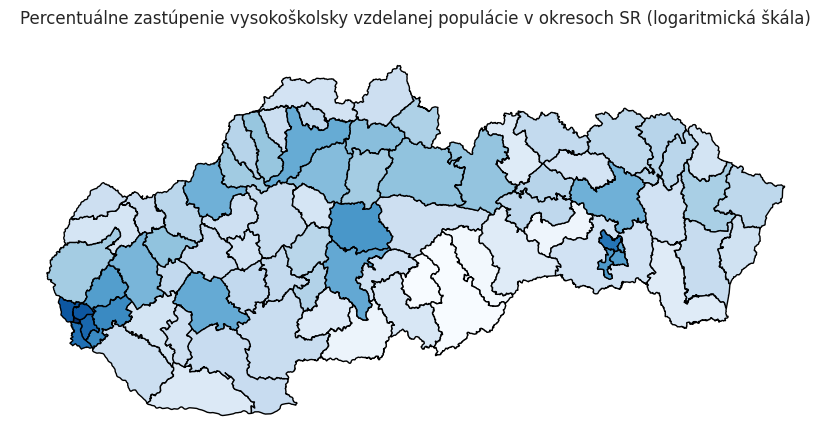

In [ ]:
title = "Percentuálne zastúpenie vysokoškolsky vzdelanej populácie v okresoch SR (logaritmická škála)"
map_plot(percenta_vysokoskolakov2, title=title, log=True)
plt.savefig('img/obr14.pdf')
plt.show()
pass

### Vek

Zanalyzujeme, aká je početnosť vysokoškolsky vzdelanej populácie podľa veku a aký podiel tvorí v jednotlivých vekových ročníkoch vysokoškolsky vzdelaná populácia.

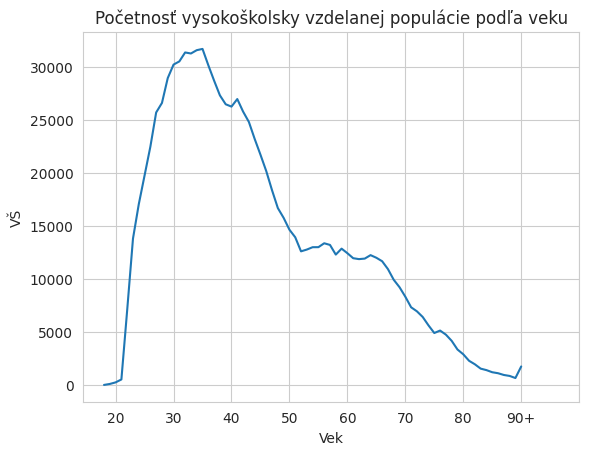

In [ ]:
all_vs = vzdelanie_vek.query("Vzdelanie.str.contains('vysokoškolské')").iloc[:,[3, 6]].groupby("Vek").sum()
all = vzdelanie_vek.set_index("Vek").loc[all_vs.index,["abs."]].groupby("Vek").sum()
vs_ratio = all_vs['abs.'] / all['abs.']
vs_vek = pd.DataFrame({'VŠ': all_vs['abs.'],
                   'Vek_int': range(18, 91),
                   'Všetci': all['abs.'],
                   '%': 100 * vs_ratio, })
vs_vek = vs_vek.reset_index()
plot = sns.lineplot(data=vs_vek, x="Vek", y="VŠ")
plot.set_title("Početnosť vysokoškolsky vzdelanej populácie podľa veku")
plot.set_xticks(range(2, 91, 10))
plt.show()
pass

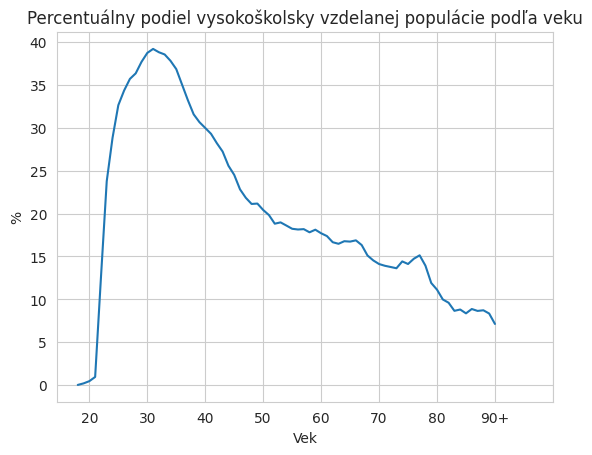

In [ ]:
plot = sns.lineplot(data=vs_vek.sort_values(by='Vek_int'), x="Vek", y="%")
plot.set_title("Percentuálny podiel vysokoškolsky vzdelanej populácie podľa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr10.pdf')
plt.show()
pass

V tomto grafe vidíme jasný rast podielu vysokoškolsky vzdelanej populácie od starších vekových ročníkov smerom k mladším. Ak sa pozrieme na posledný graf podrobnejšie, vidíme, že podiel nerástol pre celú vzorku rovnakou rýchlosťou. Až na menšie odchýlky rástol lineárne od najstarších ročníkov až po ročník, ktorý mal v čase sčítania okolo 50 rokov. Podiel mladších ročníkov rastie smerom k 30-ročným tiež lineárne, ale výrazne viac ako pre staršie ročníky.

Ročníky, ktoré mali v čase sčítania okolo 50 rokov končili stredné školy približne v čase Nežnej revolúcie (2021 - 50 + 18 = 1989). Môžeme teda predpokladať, že pád režimu otvoril väčšiemu spektru ľudí možnosť študovať na vysokej škole a obyvatelia SR túto možnosť aj využili. V 90-tych rokoch došlo aj ku vzniku nových vysokých škôl či univerzít, prípadne k zväčšeniu kapacity  už existujúcich ako odpoveď na zvýšený počet záujemcov o štúdium. Túto zmenu politickej situácie na Slovensku údaje výrazne reflektujú.

Ak by sme chceli ešte viac hypotetizovať, môžeme sa pozrieť na zaujímavú odchýlku z lineárneho rastu pri obyvateľoch s vekom medzi 75 a 79 rokmi. Ak sa pozrieme, kedy končili stredné školy, zistíme, že to bolo v priebehu 60-tych rokov 20. storočia, čo korešponduje s časom politického uvoľnenia pred Pražskou jarou. Môžeme vysloviť hypotézu, že politické uvoľnenie v 60-tych rokoch podporilo viac obyvateľov ísť študovať na vysokú školu. Mierny pokles po práve opísanom uvoľnení môžeme pripísať silnému normalizačnému procesu, ktorý nasledoval po roku 1968. Vyvolal masívnu vlnu emigrácie do zahraničia a vieme povedať, že veľký podiel emigrantov boli práve študenti na vysokých školách, prípadne ich absolventi. Počas normalizácie došlo aj k sprísneniu podmienok pre štúdium na vysokých školách a vyhadzovaniu politicky nepohodlných študentov, ktorí začali študovať vysokú školu v čase pred augustom 1968.

In [ ]:
# lineploty na vizualizáciu historických skutočností, možno sa zídu
vs_vek['Rok narodenia'] = 2021 - vs_vek.Vek_int
vs_vek['Rok dovŕšenia 18 rokov'] = 2021 - vs_vek.Vek_int + 18
vs_vek.sort_values(by='Rok narodenia', inplace=True)

figure, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
sns.lineplot(data=vs_vek, x="Rok narodenia", y='%', ax=axes[0])
sns.lineplot(data=vs_vek, x="Rok dovŕšenia 18 rokov", y='%', ax=axes[1])
plt.show()

pass

### Pohlavie (a vek)
Vo vizualizácii nižšie dokážeme nahliadnuť, že na Slovensku prevahu v populácií, ktorá je vysokoškolsky vzdelaná, majú (56.6%) ženy, zatiaľ čo muži predstavujú zvyšných 43.4%. Pozrime sa aj bližšie na to, ako je rozložená vysokoškolsky vzdelaná populácia podľa veku a pohlavia.

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(vysoka_skola.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.title("Zloženie vysokoškolsky vzdelanej populácie podľa pohlavia")
plt.legend(["Muži", "Ženy"])
plt.savefig('img/obr11.pdf')
plt.show()
pass

In [ ]:
vzdelanie_vek = pd.read_csv(download_link("https://drive.google.com/file/d/1nLGWtVLPVi53oi_C0sbBWUWE8M3vcjCF/view?usp=sharing"), sep=";")
male = vzdelanie_vek.query("Pohlavie == 'muž'")
female = vzdelanie_vek.query("Pohlavie == 'žena'")
men = male.query("Vzdelanie.str.contains('vysokoškolské')").iloc[:,[3, 6]].set_index("Vek").groupby("Vek").sum()
women = female.query("Vzdelanie.str.contains('vysokoškolské')").iloc[:,[3, 6]].set_index("Vek").groupby("Vek").sum()
men_all = male.set_index("Vek").loc[men.index,["abs."]].groupby("Vek").sum()
women_all = female.set_index("Vek").loc[women.index,["abs."]].groupby("Vek").sum()
data = {"Vek":range(18, 91), "Muži":men["abs."],"Ženy":women["abs."]}
df = pd.DataFrame(data)

melted_df = pd.melt(df, id_vars='Vek', var_name='Pohlavie')
melted_df.rename(columns={"value":"Početnosť"}, inplace=True)
plot = sns.lineplot(data=melted_df, x="Vek", y="Početnosť", hue="Pohlavie",palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_title("Početnosť vysokoškolsky vzdelaných žien a mužov")
plot = plot.grid(False)
plt.show()
pass

V tejto vizualizácií je vidieť to, že vo väčšine vekových skupín, vysokoškolsky vzdelanej populácie, majú prevahu ženy. Obrat a prevahu mužskej populácie je možné pozorovať približne vo vekovej skupine nad 60 rokov, čomu zodpovedá rok narodenia počiatkom 60. rokov 20. storočia. Zaujímavým pozorovaním je aj to, že prevaha ženskej populácie v rozmedzí veku 20 až 50 je niekoľko násobne vyššia ako tá, ktorú má mužská populácia pri veku nad 60 rokov. Môžeme sa teda hypoteticky domnievať, že približne v období v rozmedzí 70. až 80. rokov 20. storočia začal omnoho viacej narastať záujem žien o vysokoškolské štúdium, ktoré bolo evidentne skôr vyrovnané s menšou majoritou mužov. Tento trend narastal až do počiatku 20. storočia a evidentne pretrváva až dodnes. Ako možno zistiť zo zdroja [1], súčasný podiel žien na vysokých školách je okolo 59%.

Ak sa pozrieme na absolútnu početnosť všetkých mužov a žien, nielen vysokoškolsky vzdelaných, zistíme, že vo vyšších ročníkoch je žien podstatne viac:

*Poznámka: skok pri najvyššom veku je spôsobený tým, že v dátach máme jeden údaj pre všetkých obyvateľov s vekom 90 a viac. (do finálnych grafov usekneme tento posledný údaj?)*

#### Ženy vs muži percentuálne vekovo

In [ ]:
vsetci = men + women
muzi_per = men / vsetci
zeny_per = women / vsetci
data = {"Vek":range(18, 91), "Muži":muzi_per["abs."],"Ženy":zeny_per["abs."]}
df = pd.DataFrame(data)
melted_df = pd.melt(df, id_vars='Vek', var_name='Pohlavie')
melted_df.rename(columns={"value":"Početnosť"}, inplace=True)
plot = sns.lineplot(data=melted_df, x="Vek", y="Početnosť", hue="Pohlavie",palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_title("Percentuálne zastúpenie vysokoškolsky vzdelaných žien a mužov")
plot = plot.grid(False)
plt.show()

In [ ]:
df_abs = pd.DataFrame(
    {'Vek': list(map(str, range(18, 91))),
     'Muži': men_all['abs.'],
     'Ženy': women_all['abs.']}
    )
melted_df_abs = pd.melt(df_abs, id_vars='Vek', var_name='Pohlavie')
melted_df_abs.rename(columns={"value":"Početnosť"}, inplace=True)
melted_df_abs['Vek'].replace({'90': '90+'}, inplace=True)
plot = sns.lineplot(data=melted_df_abs, x='Vek', y='Početnosť', hue='Pohlavie',
                    palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_title("Absolútna početnosť mužov a žien podľa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr03.pdf')
plt.show()
pass

Kvôli týmto nerovnakým hodnotám bude zaujímavé pozrieť sa aj na percentuálny podiel vysokoškolsky vzdelanej populácie podľa veku a pohlavia.

In [ ]:
df_rel = pd.DataFrame(
    {'Vek': list(map(str, range(18, 91))),
     'Muži': 100 * men['abs.'] / men_all['abs.'],
     'Ženy': 100 * women['abs.'] / women_all['abs.']}
    )
melted_df_rel = pd.melt(df_rel, id_vars='Vek', var_name='Pohlavie')
melted_df_rel.rename(columns={"value":"Podiel"}, inplace=True)
melted_df_rel['Vek'].replace({'90': '90+'}, inplace=True)
plot = sns.lineplot(data=melted_df_rel, x='Vek', y='Podiel', hue='Pohlavie',
    palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_ylabel("%")
plot.set_title("Percentuálny podiel vysokoškolsky vzdelaných mužov a žien podľa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr12.pdf')
plt.show()
pass

Tu vidíme pre nižšie veky v zásade rovnaký graf ako pri absolútnej početnosti vysokoškolsky vzdelaných žien a mužov, až do veku 60 rokov. Nad tento vek sa však graf zásadne mení.

 Vidíme, že podiel vysokoškolsky vzdelaných žien sa od najstarších obyvateľov k mladším rovnomerne zvyšuje, miera rastu sa výraznejšie zvýši pri veku 50. Tento fakt by nepotvrdzoval hypotézu vyslovenú vyššie, že v 70. a 80. rokoch 20. storočia začal prudko narastať záujem žien o vysokoškolské vzdelanie, ale skôr, že už od 40. až 50. rokov, kam siaha naša vzorka (a najstarší obyvatelia Slovenska) záujem žien o vyššie vzdelanie stúpal.

Podiel vysokoškolsky vzdelaných mužov je približne konštantný pre mužov s vekom viac ako 50 rokov. Od veku 50 smerom k menším vekom tento podiel začal stúpať.

Ako bolo vyššie zmienené, medzník, ktorý tvoria 50-roční obyvatelia pravdepodobne korešponduje s pádom komunizmu. Na grafoch podľa pohlavie takisto vidieť pre obidve pohlavia menší, ale nápadný nárast podielu vysokoškolsky vzdelaných obyvateľov vo vekoch 75 - 78 rokov, o ktorom sme vyslovili hypotézu, že môže byť spôsobený politickým uvoľnením a následnou normalizáciou v 60-tych rokoch minulého storočia. [2]

### Podiely v samosprávnych krajoch
 V druhom rade sa zaoberáme podielom vysokoškolsky vzdelanej populácie v jednotlivých samosprávnych krajoch SR. Tieto zistenia vizualizujeme v barplote.

In [ ]:
vzdelanie_kraje_pohlavie = pd.read_csv(download_link("https://drive.google.com/file/d/13iZyo-H6Z1Iec9VqTp-NV_3qShMCyS6g/view?usp=sharing"), sep=";")
kraje_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1_WSt9B7IMAB-EuGaf__FaEmxalnm0fOs/view?usp=sharing"))
vysoka_skola_kraje = vzdelanie_kraje_pohlavie.query('Vzdelanie.str.contains("vysokoškolské")')
pocty_kraje_univerzita = vysoka_skola_kraje.groupby("Názov kraja")["abs."].sum()

vsetci_kraje = kraje_populacie.set_index("Územná jednotka").sort_values(by="Územná jednotka")["Spolu"]
nad_15_kraje = (vzdelanie_kraje_pohlavie.set_index("Názov kraja").query(
    '`Ekonomické vekové skupiny`.str.contains("15|65")').groupby("Názov kraja")["abs."].sum())

percenta_vysokoskolakov_kraje1 = round(100*pocty_kraje_univerzita/vsetci_kraje, 3)
percenta_vysokoskolakov_kraje2 = round(100*pocty_kraje_univerzita/nad_15_kraje, 3)
# Bratislava je akože iný úlet, ostatné sú viac menej veľmi podobné

kraje_populacie = kraje_populacie.set_index("Územná jednotka").sort_values(by="Územná jednotka")
kraje_populacie["Percento VŠ1"] = list(percenta_vysokoskolakov_kraje1)
kraje_populacie["Percento VŠ2"] = list(percenta_vysokoskolakov_kraje2)
kraje_populacie["Nad 15"] = list(nad_15_kraje)


#print(percenta_vysokoskolakov_kraje2.mean()) -> 21.714125
#print(percenta_vysokoskolakov_kraje2.median()) -> 19.356
# Veľmi podobný medián aj aritmetický priemer

In [ ]:
figure, axes = plt.subplots(2,sharex=True)
plot = sns.barplot(data=kraje_populacie.sort_values(by="Percento VŠ1", ascending=False),
                   x="Percento VŠ1", y="Územná jednotka",ax=axes[0])
plot.set_title("Percentuálny podiel vysokoškolsky vzdelanej populácie v krajoch SR")
plot.bar_label(plot.containers[0], label_type="center")


plot2 = sns.barplot(data=kraje_populacie.sort_values(by="Percento VŠ2", ascending=False),
                    x="Percento VŠ2", y="Územná jednotka",ax=axes[1])
plot2.bar_label(plot2.containers[0], label_type="center")
plt.show()
pass

Zaujímavým pozorovaním je tá skutočnosť, že celkový medián a priemer percentuálnych hodnôt podielu vysokoškolsky vzdelanej populácie kraja sú si veľmi podobné (```priemer = 18.262``` a ```medián = 16.3645``` pre celú populáciu SR a ```priemer = 21.71``` a ```medián = 19.36``` pre populáciu nad 15 rokov), čo indikuje veľmi podobné hodnoty naprieč celým Slovenskom. Vizualizácia však ukazuje, že všetkých sedem krajov okrem Bratislavského majú síce podobné hodnoty v rozmedzí približne dvoch percent, avšak Bratislavský kraj vykazuje hodnoty viac ako dvojnásobne vyššie. Pozrime sa na to, aký podiel predstavuje Bratislavský kraj v globálnom meradle celého Slovenska.



In [ ]:
# Bratislavský kraj vykazuje 228362 vysokoškolsky vzdelaných ľudí
print(round(100*(228362/999439), 2))

Bratislavský samosprávny kraj, ktorý vykazuje 228 362 vysokoškolsky vzdelaných obyvateľov, predstavuje v globálnom meradle celej vysokoškolsky vzdelanej populácie približne 22.85 %.

#### Kraje podľa pohlavia

In [ ]:
zeny_univerzita = vysoka_skola_kraje.query("Pohlavie == 'žena'").groupby("Názov kraja")["abs."].sum()
muzi_univerzita = vysoka_skola_kraje.query("Pohlavie == 'muž'").groupby("Názov kraja")["abs."].sum()

vsetci_kraje_pohlavie = vzdelanie_kraje_pohlavie.set_index("Názov kraja").groupby(["Názov kraja","Pohlavie"])["abs."].sum().reset_index().set_index("Názov kraja")
nad_15_kraje_pohlavie = (vzdelanie_kraje_pohlavie.set_index("Názov kraja").query(
    '`Ekonomické vekové skupiny`.str.contains("15|65")').groupby(["Názov kraja","Pohlavie"])["abs."].sum())

percenta_zeny_univerzita = (100*zeny_univerzita / vsetci_kraje)
percenta_muzi_univerzita = (100*muzi_univerzita / vsetci_kraje)

data = pd.DataFrame({"Kraje":list(nad_15_kraje.index),"Muži":list(percenta_muzi_univerzita),"Ženy":list(percenta_zeny_univerzita)})
zeny_muzi = pd.melt(data,id_vars="Kraje",var_name="Pohlavie")
zeny_muzi.sort_values("value",inplace=True,ascending=False)
zeny_muzi.rename(columns={"value":"Percento"}, inplace=True)
plot = sns.barplot(data=zeny_muzi, y="Kraje",x="Percento", hue="Pohlavie",palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_title("Percento vysokoškolsky vzdelaných žien a mužov v krajoch")
plt.show()
pass

Vo vizualizácii vyššie sme sa presvedčili, že naprieč vekom 20 až 60 rokov majú v absolútnej početnosti vysokoškolsky vzdelaných osôb prevahu ženy. Táto skutočnosť ide v istej miere ruka v ruke so skutočnosťou prevahy ženskej populácie nad mužskou v globále celej populácie SR. Ako sa môžeme presvedčiť aj na vizualizácii vyššie, ženská populácia má prevahu aj vo všetkých samosprávnych krajoch SR.




Ak sa pozrieme na tieto dáta podrobnejšie, zistíme, že podiel mužškej a ženskej vysokoškolsky vzdelanej populácie v jednotlivých samosprávnych krajoch je veľmi podobná, nakoľko podiel ženskej populácie je v rozmedzí približne 55 % *(Bratislavský kraj)* až 57 % *(napr. Trnavský alebo Prešovský kraj)*.

### Rozloženie mesto vs vidiek

Do nového datasetu pridáme ďalší stĺpec, ktorý bude označovať, či je daná obec mesto alebo nie.

In [ ]:
vzdelanie_obce = pd.read_csv(download_link("https://drive.google.com/file/d/13lqG_aRaKlnjWWw7WKeuK6EzF6RnFXvC/view?usp=drive_link"), sep=";")
obce_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/19CVfzu9jQcR18n6vBhUJ3z4_x03Xoxr3/view?usp=sharing"))
vzdelanie_obce['Mesto'] = vzdelanie_obce['Názov obce']
obce_populacie['Mesto'] = obce_populacie['Územná jednotka']
vzdelanie_obce = vzdelanie_obce.set_index("Názov obce")
obce_populacie = obce_populacie.set_index("Územná jednotka")

mesta_set = set(mesta)

def mesto_func(string):
  if string.startswith("Bratislava") or string.startswith("Košice") or string in mesta_set:
    return 1
  return 0

vzdelanie_obce['Mesto'] = vzdelanie_obce['Mesto'].apply(mesto_func)
obce_populacie['Mesto'] = obce_populacie['Mesto'].apply(mesto_func)

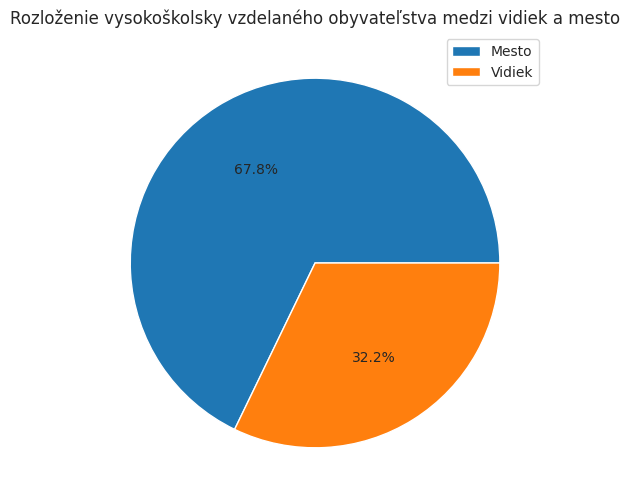

In [ ]:
s_univerzitou =  vzdelanie_obce.query('Vzdelanie.str.contains("vysokoškolské")')
count_all_vs = s_univerzitou['abs.'].sum()
count_town_vs = s_univerzitou.query('Mesto==1')['abs.'].sum()
vs_mesta_grouped = s_univerzitou.groupby('Mesto')['abs.'].sum()
obce_mesta_grouped = obce_populacie.groupby('Mesto')['Spolu'].sum()
plt.figure(figsize=(6,6))
plt.pie([vs_mesta_grouped[1], vs_mesta_grouped[0]], autopct='%1.1f%%')
plt.title("Rozloženie vysokoškolsky vzdelaného obyvateľstva medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr13.pdf')
plt.show()
pass

Berúc do úvahy tú skutočnosť, že väčšina *(53.2 %)* obyvateľstva SR žije v mestách, je prirodzené predpokladať aj koncentráciu vysokoškolsky vzdelanej populácie v mestách. Vo vizualizácii vyššie sme sa presvedčili, že táto prevaha miest je naozaj veľká, nakoľko až 67.8 % vysokoškolsky vzdelanej populácie žije v mestách.

V mape, ktorá vizualizovala podiel vysokoškolskej populácie v jednotlivých okresoch SR je evidentný obrovský podiel v dvoch najväčších mestách – Bratislave a Košiciach. Pozrime sa bližšie aj na to, aký podiel predstavujú práve tieto dve mestá.

In [ ]:
# Bratislava a Košice vykazujú celkovo 234768 vysokoškolsky vzdelaných ľudí
print("BA a KE vykazujú 234 768 vysokoškolsky vzdelaných obyvateľov")
print(f"Čo predstavuje približne {round(100*(234768/999439), 2)}% celej vysokoškolsky vzdelanej populácie")

BA a KE vykazujú 234 768 vysokoškolsky vzdelaných obyvateľov
Čo predstavuje približne 23.49% celej vysokoškolsky vzdelanej populácie


Mestá Bratislava a Košice, ktoré vykazujú 234 768 vysokoškolsky vzdelaných obyvateľov, predstavujú v globálnom meradle celej vysokoškolsky vzdelanej populácie približne 23.49 %.

Zaujímavým pozorovaním, popri koncentrácii vysokoškolsky vzdelaného obyvateľstva v mestách, je aj váha krajských miest v globálnom meradle celej vysokoškolsky vzdelanej populácie.

In [ ]:
#mesta = vzdelanie_obce.query("Vzdelanie.str.contains('vysokoškolské')").set_index("Názov obce").query('`Názov obce`.str.startswith("Košice")').iloc[:,6].sum()
university_by_cities = {"BA":173848, "TT":15605, "NR":22916, "TN":14691, "ZA": 22820, "BB": 22039, "PO":22852, "KE":60920}
# Jednotlivé hodnoty v university_by_cities získané query prechodmi datasetov

print(f"Vysokoškolsky vzdelaná populácia krajských miest tvorí {round(100*(sum(university_by_cities.values())/999439), 2)} % celkovej populácie")

Vysokoškolsky vzdelaná populácia krajských miest tvorí 35.59 % celkovej populácie


Vysokoškolsky vzdelaná populácia Bratislavy a Košíc predstavuje až 23.44 % celej vysokoškolsky vzdelanej populácie SR.

## Stredoškolské

Maturitné

### Podľa pohlavia

#### Maturitné

In [ ]:
# Ľudia s maturitou (stredná škola aj vysoká)
s_maturitou = vzdelanie_obce.query('Vzdelanie.str.contains("vysokoškolské|vyššie|úplné")')
pohlavie_s_maturitou = s_maturitou.groupby('Pohlavie')['abs.'].sum()

# Ľudia bez maturity
bez_maturity = vzdelanie_obce[vzdelanie_obce['Vzdelanie'].str.contains("vysokoškolské|vyššie|úplné") == False]
#display(bez_maturity)
pohlavie_bez_maturity = bez_maturity.groupby('Pohlavie')['abs.'].sum()

vsetci = vzdelanie_obce.groupby('Pohlavie')['abs.'].sum()
assert vsetci['muž'] == pohlavie_s_maturitou['muž'] + pohlavie_bez_maturity['muž']
assert vsetci['žena'] == pohlavie_s_maturitou['žena'] + pohlavie_bez_maturity['žena']

Pohlavie
muž     1190876
žena    1416751
Name: abs., dtype: int64

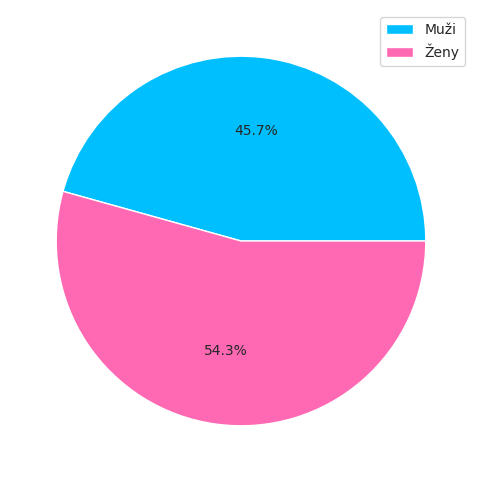

In [ ]:
# Bez maturity mesto/dedina
# S maturitou mesto/dedina
display(s_maturitou.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(s_maturitou.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
#plt.title("Zloženie stredoškolsky vzdelanej populácie podľa pohlavia")
plt.legend(["Muži", "Ženy"])
plt.savefig('img/obr17.pdf')
plt.show()
pass

Ako aj pri štruktre vysokoškolsky vzdelaného obyvateľstva, aj pri populácii so zloženou štátnou maturitnou skúškou, majú prevahu opäť ženy, ktoré tvoria až 54.3 % populácie SR s maturitnou skúškou, zatiaľ čo muži tvoria 45.7 %.

#### Percentuálne zastúpenie vzdelania podľa pohlavia

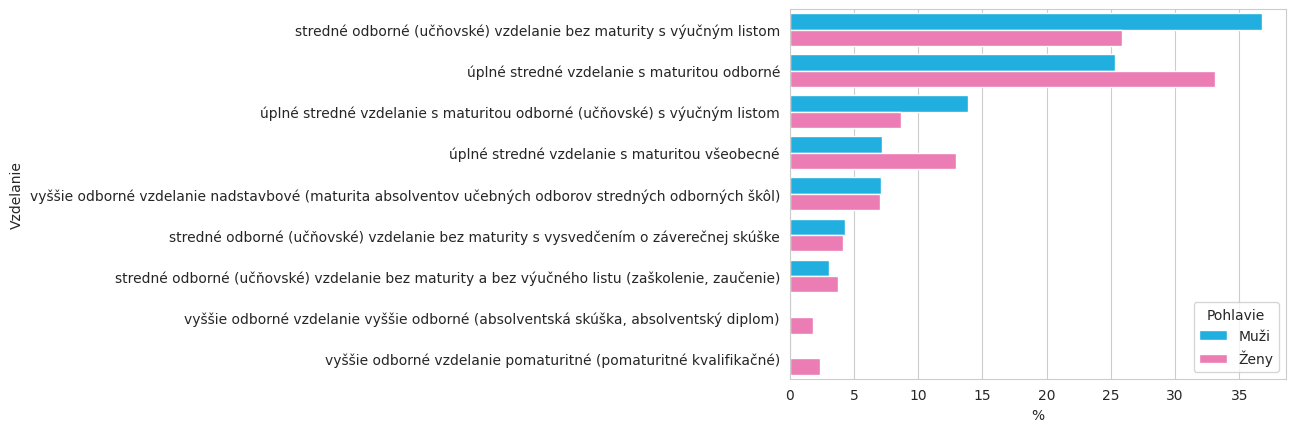

In [ ]:
muzi_stredne = vzdelanie_obce.query('Pohlavie == "muž" and "predproduktívny vek (0-14 rokov)" not in `Ekonomické vekové skupiny` and Vzdelanie.str.contains("stredné|vyššie")')
muzi_stredne_vzdelanie = muzi_stredne.groupby('Vzdelanie')['abs.'].sum().apply(lambda x: x / muzi_stredne['abs.'].sum() * 100).sort_values(ascending=False)

zeny_stredne = vzdelanie_obce.query('Pohlavie == "žena" and "predproduktívny vek (0-14 rokov)" not in `Ekonomické vekové skupiny` and Vzdelanie.str.contains("stredné|vyššie")')
zeny_stredne_vzdelanie = zeny_stredne.groupby('Vzdelanie')['abs.'].sum().apply(lambda x: x / zeny_stredne['abs.'].sum() * 100).sort_values()

table = zeny_stredne_vzdelanie.to_frame().reset_index().rename(columns={'abs.': 'Ženy'})
table2 = muzi_stredne_vzdelanie.to_frame().reset_index().rename(columns={'abs.': 'Muži'})
new = table2.merge(table)
new = pd.melt(new, id_vars='Vzdelanie', var_name='Pohlavie').query('value>1')
plot = sns.barplot(data=new, x='value', y='Vzdelanie', hue='Pohlavie', palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set(xlabel='%')
plt.savefig('img/obr20.pdf')
plt.show()
pass

#### Stredoškolské - aj bez maturity



Pohlavie
muž     1798338
žena    1852785
Name: abs., dtype: int64

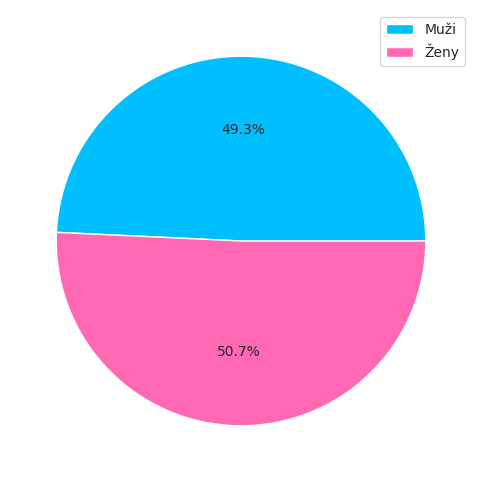

In [ ]:
stredoskolske_vzd = vzdelanie_obce.query('Vzdelanie.str.contains("vysokoškolské|vyššie|úplné|stredné")')
zeny_strd = stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum()['žena']
muzi_strd = stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum()['muž']
display(stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(stredoskolske_vzd.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.legend(["Muži", "Ženy"])
#plt.title("Rozloženie obyvateľstva s aspoň stredoškolským vzdelaním podľa pohlavia ")
plt.savefig('img/obr15.pdf')
plt.show()
pass

##### Iba stredoškolské

Pohlavie
muž     1364945
žena    1286739
Name: abs., dtype: int64

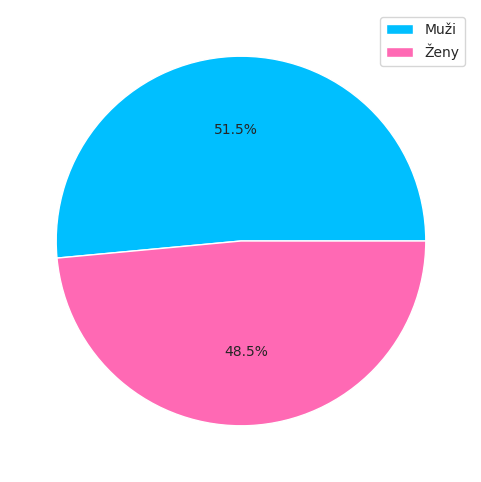

In [ ]:
stredoskolske_vzd2 = vzdelanie_obce.query('Vzdelanie.str.contains("vyššie|úplné|stredné")')
zeny_strd2 = stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum()['žena']
muzi_strd2 = stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum()['muž']
display(stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(stredoskolske_vzd2.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.legend(["Muži", "Ženy"])
#plt.title("Rozloženie obyvateľstva iba stredoškolské podľa pohlavia")
plt.savefig('img/obr16.pdf')
plt.show()
pass

### Mesto vs vidiek

#### Maturitné

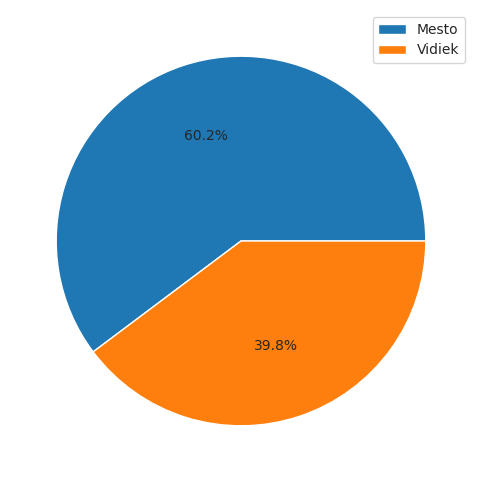

In [ ]:
count_town_ss = s_maturitou.query('Mesto==1')['abs.'].sum()
ss_mesta_grouped = s_maturitou.groupby('Mesto')['abs.'].sum()
obce_mesta_grouped = obce_populacie.groupby('Mesto')['Spolu'].sum()
plt.figure(figsize=(6,6))
plt.pie([ss_mesta_grouped[1], ss_mesta_grouped[0]], autopct='%1.1f%%')
#plt.title("Rozloženie obyvateľstva s maturitnou skúškou medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr22.pdf')
plt.show()

##### Iba maturanti

65020

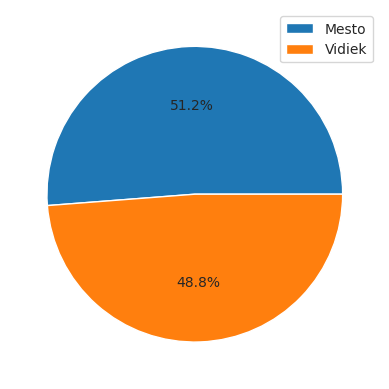

In [ ]:
stredosk_mesta = stredoskolske_vzd2.groupby("Mesto")["abs."].sum()
plt.pie([stredosk_mesta[1],stredosk_mesta[0]], autopct='%1.1f%%')
display(stredosk_mesta[1]-stredosk_mesta[0])
plt.legend(["Mesto","Vidiek"])
#plt.title("Rozloženie obyvateľstva iba stredoškolské medzi mesto a vidiek")
plt.savefig('img/obr23.pdf')
pass

O niečo nižšiu koncentráciu populácie, v porovnaní s vysokoškolsky vzdelanou, v mestách pozorujeme pri populácii s maturitnou skúškou. Až 60.2 % obyvateľov s maturitou žije v mestách, zatiaľ čo zhruba 39.8 % na vidieku. Táto skutočnosť dosť možno indikuje aj to, že vidiek ponúka viacej možných pracovných príležitostí pre tých, ktorí majú najvyššie stredné vzdelanie s maturitou, ako ponúka v porovnaní s mestiami pre vysokoškolsky vzdelaných.

#### Aj bez maturity

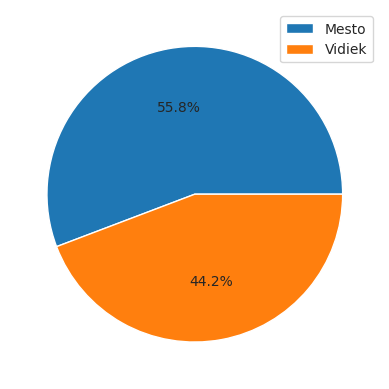

In [ ]:
str_mesto = stredoskolske_vzd.groupby("Mesto")["abs."].sum()
plt.pie([str_mesto[1],str_mesto[0]], autopct='%1.1f%%')
plt.legend(["Mesto","Vidiek"])
plt.savefig('img/obr21.pdf')
pass

##### Iba stredoškolské vzdelanie


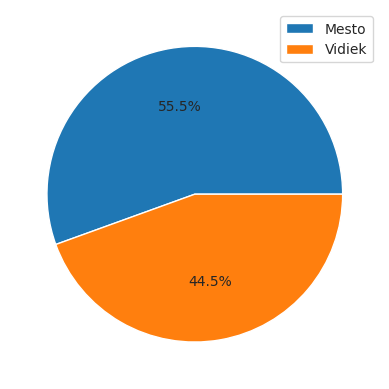

In [ ]:

iba_maturita = vzdelanie_obce.query("Vzdelanie.str.contains('úplné|vyššie')")
iba_mat_mesta = iba_maturita.groupby("Mesto")["abs."].sum()
plt.pie([iba_mat_mesta[1],iba_mat_mesta[0]], autopct='%1.1f%%')
plt.legend(["Mesto","Vidiek"])
plt.show()
pass

### Mapa

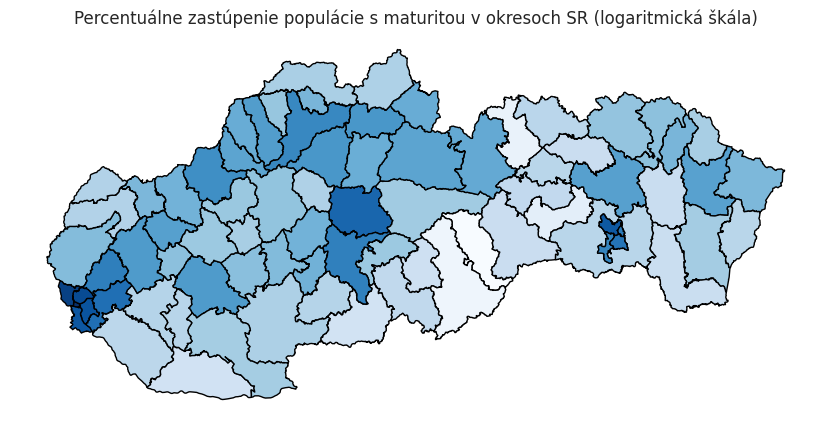

In [ ]:
stredna_skola = vzdelanie_okresy_pohlavie.query('Vzdelanie.str.contains("vysokoškolské|vyššie|úplné")')
stredna_skola = stredna_skola.set_index(["Názov okresu", "Pohlavie"])
#Počty/Podiely stredoškolsky vzdelaných (akýkoľvek stupeň a vyšší stupeň) podľa okresov
pocty = stredna_skola.groupby("Názov okresu")["abs."].sum()
percenta_stredoskolakov1 = round(100*pocty/vsetci, 3)
percenta_stredoskolakov2 = round(100*pocty/nad_15, 3)

#Počty vysokoškolsky vzdelaných (akýkoľvek stupeň) podľa pohlavia

#districts_university["maturita1"] = np.log(percenta_stredoskolakov1).to_list()
#districts_university["maturita2"] = np.log(percenta_stredoskolakov2).to_list()
#'''
#ma1 = districts_university.plot(column="maturita1", cmap='Blues',
#                                figsize=(11,5), edgecolor="black")
#'''
#ma2 = districts_university.plot(column="maturita2", cmap='Blues',
#                                figsize=(11,5), edgecolor="black")
#plt.axis("off")
#plt.title("Percentuálne zastúpenie populácie s maturitou v okresoch SR (logaritmická škála)")

title = "Percentuálne zastúpenie populácie s maturitou v okresoch SR (logaritmická škála)"
map_plot(percenta_stredoskolakov2, title=title, log=True)
plt.savefig('img/obr26.pdf')
pass

Nerovnosti v podiele obyvateľstva s maturitnou skúškou v jednotlivých okresoch SR sú veľmi podobné tým, ktoré predstavujú podiely vysokoškolsky vzdelaných. Opätovne môžeme pozorovať extrémy v krajských mestách, prípadne v aglomerácii Bratislavy *(okresy Pezinok a Senec)* alebo niektoré dobre rozvinuté okresy ako napr. Zvolen alebo Piešťany. Opačným extrémom sú opäť okresy v hladových dolinách – Kežmarok, Rimavská Sobota alebo Revúca.

Čo stojí sa spomenutie je komparatívne lepšia situácia v hladovej doline okres Poltár, kde je tento podiel komparatívne o niečo lepší, ako v iných regiónoch s podobnou mierou nezamestnanosti.

###Podiely v samosprávnych krajoch

In [ ]:
stredna_skola_kraje = vzdelanie_kraje_pohlavie.query('Vzdelanie.str.contains("vysokoškolské|vyššie|úplné")')
pocty_kraje_maturita = stredna_skola_kraje.groupby("Názov kraja")["abs."].sum()

zeny_stredna_kraje = stredna_skola_kraje.query("Pohlavie == 'muž'")
muzi_stredna_kraje = stredna_skola_kraje.query("Pohlavie == 'žena'")

pocty_kraje_maturita_zeny = zeny_stredna_kraje.groupby("Názov kraja")["abs."].sum()
pocty_kraje_maturita_muzi = muzi_stredna_kraje.groupby("Názov kraja")["abs."].sum()

percenta_stredoskolakov_kraje1 = round(100*pocty_kraje_maturita/vsetci_kraje, 3)
percenta_stredoskolakov_kraje2 = round(100*pocty_kraje_maturita/nad_15_kraje, 3)
# Bratislava je akože iný úlet, ostatné sú viac menej veľmi podobné
kraje_populacie["Percento SŠ1"] = list(percenta_stredoskolakov_kraje1)
kraje_populacie["Percento SŠ2"] = list(percenta_stredoskolakov_kraje2)
#print(percenta_stredoskolakov_kraje1.mean())# -> 47.980625
#print(percenta_stredoskolakov_kraje1.median())# -> 46.0775
kraje_populacie["Podiel"] = np.round(kraje_populacie["Percento VŠ1"] / kraje_populacie["Percento SŠ1"] * 100,2)
# Veĺmi podobný medián aj aritmetický priemer

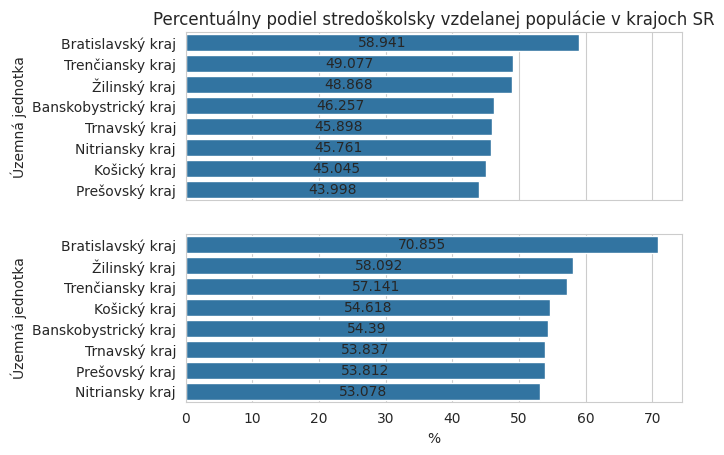

In [ ]:
figure, axes = plt.subplots(2,sharex=True)
plot1 = sns.barplot(data=kraje_populacie.sort_values(by="Percento SŠ1", ascending=False),
                   x="Percento SŠ1", y="Územná jednotka", ax=axes[0])
plot1.set_title("Percentuálny podiel stredoškolsky vzdelanej populácie v krajoch SR")
plot1.bar_label(plot1.containers[0], label_type="center")
plot2 = sns.barplot(data=kraje_populacie.sort_values(by="Percento SŠ2", ascending=False),
                   x="Percento SŠ2", y="Územná jednotka", ax=axes[1])
plot2.bar_label(plot2.containers[0], label_type="center")
plot2.set_xlabel("%")
plt.savefig('img/obr24.pdf')
plt.show()
pass

#### Podľa pohlavia

Názov kraja
Banskobystrický kraj    3.955237
Bratislavský kraj       5.659334
Košický kraj            3.318904
Nitriansky kraj         4.440035
Prešovský kraj          3.140565
Trenčiansky kraj        3.910374
Trnavský kraj           4.698520
Žilinský kraj           4.278693
dtype: float64

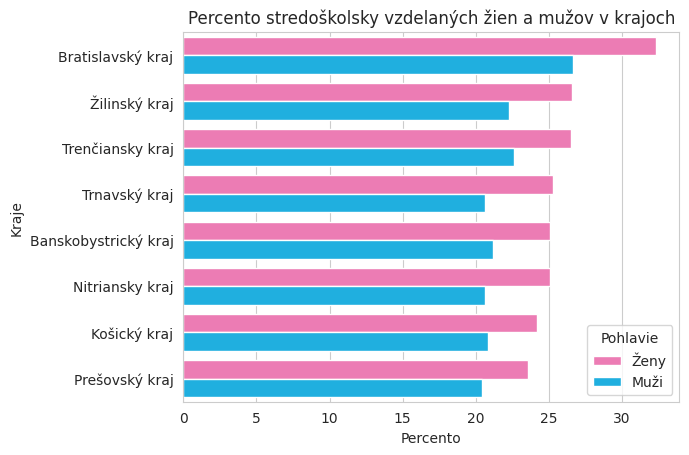

In [ ]:
zeny_maturita = stredna_skola_kraje.query("Pohlavie == 'žena'").groupby("Názov kraja")["abs."].sum()
muzi_maturita = stredna_skola_kraje.query("Pohlavie == 'muž'").groupby("Názov kraja")["abs."].sum()
percenta_zeny_maturita = (100*zeny_maturita / vsetci_kraje)
percenta_muzi_maturita = (100*muzi_maturita / vsetci_kraje)
display((zeny_maturita - muzi_maturita)/vsetci_kraje*100)
data = pd.DataFrame({"Kraje":list(nad_15_kraje.index),"Muži":list(percenta_muzi_maturita),"Ženy":list(percenta_zeny_maturita)})
zeny_muzi = pd.melt(data,id_vars="Kraje",var_name="Pohlavie")
zeny_muzi.sort_values("value",inplace=True,ascending=False)
zeny_muzi.rename(columns={"value":"Percento"}, inplace=True)
plot = sns.barplot(data=zeny_muzi, y="Kraje",x="Percento", hue="Pohlavie",palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set_title("Percento stredoškolsky vzdelaných žien a mužov v krajoch")
plt.savefig('img/obr25.pdf')
plt.show()
pass

## Percento ľudí idúci ďalej študovať

### Podľa krajov

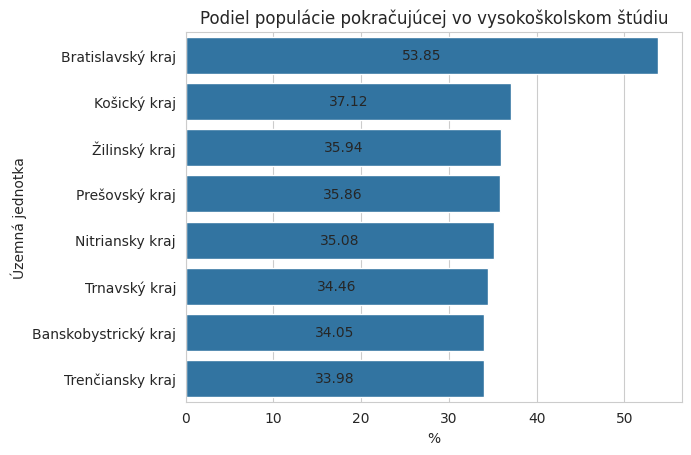

In [ ]:
plot1 = sns.barplot(data=kraje_populacie.sort_values(by="Podiel", ascending=False), x="Podiel", y="Územná jednotka")
plot1.set_xlabel("%")
plot1.bar_label(plot1.containers[0], label_type="center")
plot1.set_title("Podiel populácie pokračujúcej vo vysokoškolskom štúdiu")
plt.savefig('img/obr27.pdf')
plt.show()
pass

### Podľa okresov

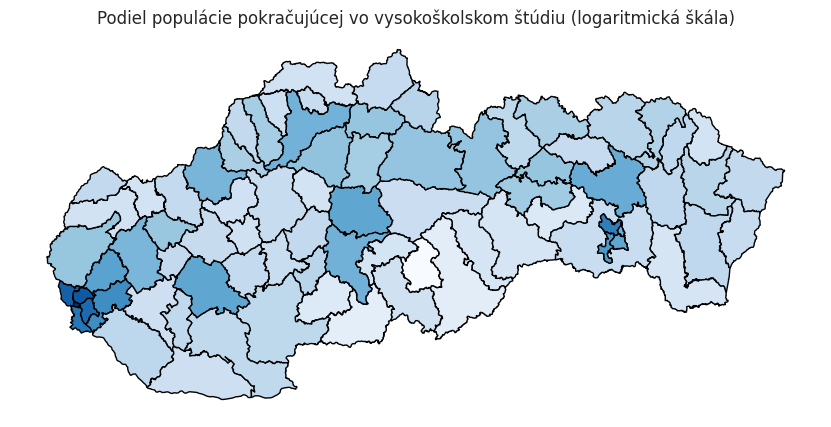

In [ ]:
title = "Podiel populácie pokračujúcej vo vysokoškolskom štúdiu (logaritmická škála)"
map_plot(percenta_vysokoskolakov2/percenta_stredoskolakov2, title=title , log=True)
plt.savefig('img/obr28.pdf')
pass

### Západ, stred a východ

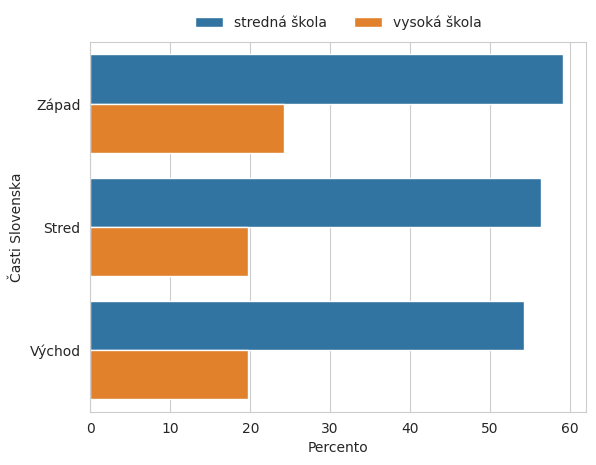

In [ ]:
tri_casti = {
    "Západ":["Bratislavský kraj","Trnavský kraj","Trenčiansky kraj","Nitriansky kraj"],
    "Stred":["Banskobystrický kraj","Žilinský kraj"],
    "Východ":["Prešovský kraj","Košický kraj"]
}
data_casti = {"Časti Slovenska":tri_casti.keys()}
for cast, kraje in tri_casti.items():
  obyvatelia = kraje_populacie.loc[kraje,"Nad 15"]
  percentaSS = kraje_populacie.loc[kraje,"Percento SŠ2"]
  percentaVS = kraje_populacie.loc[kraje,"Percento VŠ2"]
  data_casti["stredná škola"] = data_casti.get("stredná škola",[])
  data_casti["vysoká škola"] = data_casti.get("vysoká škola",[])
  data_casti["stredná škola"].append((obyvatelia * percentaSS).sum() / obyvatelia.sum())
  data_casti["vysoká škola"].append((obyvatelia * percentaVS).sum() / obyvatelia.sum())
df = pd.DataFrame(data_casti)
data_casti = pd.melt(df, id_vars="Časti Slovenska", var_name="Typ vzdelania")
data_casti.rename(columns={"value":"Percento"},inplace=True)
plot = sns.barplot(data_casti,x="Percento",y="Časti Slovenska", hue="Typ vzdelania")
sns.move_legend(plot,"lower center",bbox_to_anchor=(.5, 1),ncol=2,title=None, frameon=False)
plt.show()
pass

## Základoškolské

In [ ]:
muzi_zkld = zakladne.query('Pohlavie=="muž"').groupby('Vek')['abs.'].sum() / men_all['abs.'] * 100
muzi_zkld.rename(index={"90 a viac rokov": '90+'}, inplace=True)

zeny_zkld = zakladne.query('Pohlavie=="žena"').groupby('Vek')['abs.'].sum() / women_all['abs.'] * 100
zeny_zkld.rename(index={"90 a viac rokov": '90+'}, inplace=True)

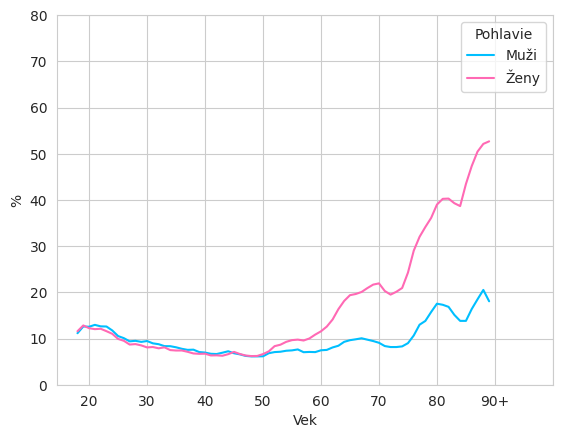

In [ ]:
tab1 = muzi_zkld.to_frame().reset_index().rename(columns={'abs.': 'Muži'})
tab2 = zeny_zkld.to_frame().reset_index().rename(columns={'abs.': 'Ženy'})
tab3 = tab1.merge(tab2)
tab3 = pd.melt(tab3, id_vars='Vek', var_name='Pohlavie')
plot = sns.lineplot(data=tab3, x='Vek', y='value', hue='Pohlavie', palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set(ylabel='%')
#plot.set(title="Percentuálny podiel obyvateľstva so základným vzdelaním podľa veku a pohlavia")

ax = plt.gca()

ax.set_xticks(range(2, 91, 10))
ax.set_ylim(ymin=0, ymax=80)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.savefig('img/obr19.pdf')
plt.show()
pass

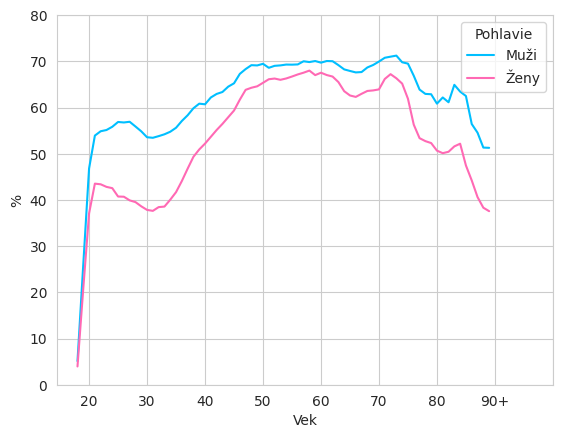

In [ ]:
muzi_str = stredne.query('Pohlavie=="muž"').groupby('Vek')['abs.'].sum() / men_all['abs.'] * 100
muzi_str.rename(index={"90 a viac rokov": '90+'}, inplace=True)

zeny_str = stredne.query('Pohlavie=="žena"').groupby('Vek')['abs.'].sum() / women_all['abs.'] * 100
zeny_str.rename(index={"90 a viac rokov": '90+'}, inplace=True)

tab1 = muzi_str.to_frame().reset_index().rename(columns={'abs.': 'Muži'})
tab2 = zeny_str.to_frame().reset_index().rename(columns={'abs.': 'Ženy'})
tab3 = tab1.merge(tab2)
tab3 = pd.melt(tab3, id_vars='Vek', var_name='Pohlavie')
plot = sns.lineplot(data=tab3, x='Vek', y='value', hue='Pohlavie', palette={"Ženy":"hotpink","Muži":"deepskyblue"})
plot.set(ylabel='%')

ax = plt.gca()

ax.set_xticks(range(2, 91, 10))
ax.set_ylim(ymin=0, ymax=80)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.savefig('img/obr18.pdf')
plt.show()
pass

## Referencie

[1] https://sita.sk/vskolstve/pocet-studentov-na-slovenskych-vysokych-skolach-vlani-klesol-o-takmer-sedemsto-podiel-zien-bol-59-percent/

[2] Politické previerky a čistky. [online]. Múzeum obetí komunizmu. [citované dňa 7.5.2024]. Dostupné na internete: <https://mok.sk/kategorie_obeti/polilticke-previerky/>.